In [1]:
from imdbpie import Imdb
import os
import charts_function_list

In [2]:
_,datafolder,outputs=charts_function_list.folder_setup()

In [57]:
os.chdir(datafolder)
sequels = pd.read_csv('sequels_list_cleaned.csv')
sequels = sequels.sort_values(['Category','year']).set_index('Category')

In [58]:
#re_index as multi with numeric values
charts_function_list.multi_numeric_index(sequels)

imdb_id  \
Category                                
Child's Play            0   tt0094862   
                        1   tt0099253   
                        2   tt0103956   
                        3   tt0144120   
                        4   tt0387575   
                        5   tt2230358   
Die Hard                0   tt0095016   
                        1   tt0099423   
                        2   tt0112864   
                        3   tt0337978   
                        4   tt1606378   
Fast and Furious        0   tt0232500   
                        1   tt0322259   
                        2   tt0463985   
                        3   tt1013752   
                        4   tt1596343   
                        5   tt1905041   
                        6   tt2820852   
                        7   tt4630562   
Final Destination       0   tt0195714   
                        1   tt0309593   
                        2   tt0414982   
                        3   tt1144884   
                        4   tt1622979   
Friday the 13th         0   tt0080761   
                        1   tt0082418   
                        2   tt0083972   
                        3   tt0087298   
                        4   tt0089173   
                        5   tt0091080   
                        6   tt0095179   
                        7   tt0097388   
                        8   tt0107254   
                        9   tt0211443   
                        10  tt0329101   
Mission Impossible      0   tt0117060   
                        1   tt0120755   
                        2   tt0317919   
                        3   tt1229238   
                        4   tt2381249   
Nightmare on Elm Street 0   tt0087800   
                        1   tt0089686   
                        2   tt0093629   
                        3   tt0095742   
                        4   tt0097981   
                        5   tt0101917   
                        6   tt0111686   
                        7   tt0329101   
Police Academy          0   tt0087928   
                        1   tt0089822   
                        2   tt0091777   
                        3   tt0093756   
                        4   tt0095882   
                        5   tt0098105   
                        6   tt0110857   
Resident Evil           0   tt0120804   
                        1   tt0318627   
                        2   tt0432021   
                        3   tt1220634   
                        4   tt1855325   
                        5   tt2592614   
Rocky                   0   tt0075148   
                        1   tt0079817   
                        2   tt0084602   
                        3   tt0089927   
                        4   tt0100507   
                        5   tt0479143   
                        6   tt3076658   
Saw                     0   tt0387564   
                        1   tt0432348   
                        2   tt0489270   
                        3   tt0890870   
                        4   tt1132626   
                        5   tt1233227   
                        6   tt1477076   
Star Trek               0   tt0079945   
                        1   tt0084726   
                        2   tt0088170   
                        3   tt0092007   
                        4   tt0098382   
                        5   tt0102975   
Step Up                 0   tt0462590   
                        1   tt1023481   
                        2   tt1193631   
                        3   tt1800741   
                        4   tt2626350   

                                                                       title  \
Category                                                                       
Child's Play            0                                       Child's Play   
                        1                                     Child's Play 2   
                        2                                     Child's Play 3   
                     

In [7]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

### Pull ratings and votes using the imdb id

In [15]:
title_list = sequels['imdb_id'].values
ratings_and_votes = pd.DataFrame({'rating':[imdb.get_title_by_id(title_).rating for title_ in title_list],
                        'votes':[imdb.get_title_by_id(title_).votes for title_ in title_list],
                                 'imdb_id':[title_ for title_ in title_list]})
sequels_with_ratings = pd.merge(sequels,ratings_and_votes,on='imdb_id',how='left')

In [59]:
sequels = sequels.reset_index()
sequels_with_ratings = pd.merge(sequels,ratings_and_votes,on='imdb_id',how='left')
sequels_with_ratings= sequels_with_ratings.set_index(['Category','level_1'],drop=True)

In [62]:
sequels_with_ratings

imdb_id  \
Category                level_1              
Child's Play            0        tt0094862   
                        1        tt0099253   
                        2        tt0103956   
                        3        tt0144120   
                        4        tt0387575   
                        5        tt2230358   
Die Hard                0        tt0095016   
                        1        tt0099423   
                        2        tt0112864   
                        3        tt0337978   
                        4        tt1606378   
Fast and Furious        0        tt0232500   
                        1        tt0322259   
                        2        tt0463985   
                        3        tt1013752   
                        4        tt1596343   
                        5        tt1905041   
                        6        tt2820852   
                        7        tt4630562   
Final Destination       0        tt0195714   
                        1        tt0309593   
                        2        tt0414982   
                        3        tt1144884   
                        4        tt1622979   
Friday the 13th         0        tt0080761   
                        1        tt0082418   
                        2        tt0083972   
                        3        tt0087298   
                        4        tt0089173   
                        5        tt0091080   
                        6        tt0095179   
                        7        tt0097388   
                        8        tt0107254   
                        9        tt0211443   
                        10       tt0329101   
                        10       tt0329101   
Mission Impossible      0        tt0117060   
                        1        tt0120755   
                        2        tt0317919   
                        3        tt1229238   
                        4        tt2381249   
Nightmare on Elm Street 0        tt0087800   
                        1        tt0089686   
                        2        tt0093629   
                        3        tt0095742   
                        4        tt0097981   
                        5        tt0101917   
                        6        tt0111686   
                        7        tt0329101   
                        7        tt0329101   
Police Academy          0        tt0087928   
                        1        tt0089822   
                        2        tt0091777   
                        3        tt0093756   
                        4        tt0095882   
                        5        tt0098105   
                        6        tt0110857   
Resident Evil           0        tt0120804   
                        1        tt0318627   
                        2        tt0432021   
                        3        tt1220634   
                        4        tt1855325   
                        5        tt2592614   
Rocky                   0        tt0075148   
                        1        tt0079817   
                        2        tt0084602   
                        3        tt0089927   
                        4        tt0100507   
                        5        tt0479143   
                        6        tt3076658   
Saw                     0        tt0387564   
                        1        tt0432348   
                        2        tt0489270   
                        3        tt0890870   
                        4        tt1132626   
                        5        tt1233227   
                        6        tt1477076   
Star Trek               0        tt0079945   
                        1        tt0084726   
                        2        tt0088170   
                        3        tt0092007   
                        4        tt0098382   
                        5        tt0102975   
Step Up                 0        tt0462590   
                        1        tt1023481   
                        2        

In [61]:
#Since the get_title_by_id function takes a while to complete, save as a new .csv for faster access later
os.chdir(datafolder)
sequels_with_ratings.to_csv('sequels_with_rating.csv')

In [128]:
class chart_maker(object):
    def __init__(self,title,title_size):
        self.title = title
        self.title_size = title_size
    
    def initial_fig_axis(self,figsize=(11,8)):
        fig = plt.figure(figsize=figsize)
        fig.suptitle(self.title,fontsize=self.title_size)
        return fig
    
    def axes_set_up(self,rows='1',columns='1',plot_num='1'):
        ax = fig.add_subplot(rows+columns+plot_num)
        return ax
        
        
    

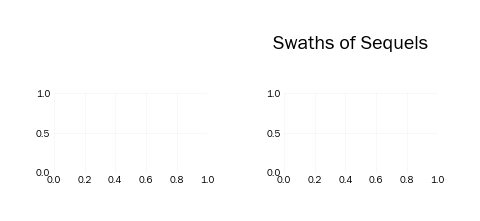

In [143]:
my_new_chart = chart_maker(title='Swaths of Sequels',title_size=20)
fig = my_new_chart.initial_fig_axis()

for item in range(2):
    ax = my_new_chart.axes_set_up(rows='4',columns='4',plot_num=str(item+1)) 
    plt.title()

    
for item in sequels_with_ratings.index.get_level_values(0).unique(): 
    fig = plt.figure(figure=)
    plt.title(item)
    plt.plot(sequels_with_ratings.loc[item].index.values,sequels_with_ratings.loc[item]['rating'])
    plt.show()
    
plt.show()

In [93]:
fig = plt.figure(figure=)
    plt.title(item)
    plt.plot(sequels_with_ratings.loc[item].index.values,sequels_with_ratings.loc[item]['rating'])
    plt.show()

Index(['Child's Play', 'Die Hard', 'Fast and Furious', 'Final Destination',
       'Friday the 13th', 'Mission Impossible', 'Nightmare on Elm Street',
       'Police Academy', 'Resident Evil', 'Rocky', 'Saw', 'Star Trek',
       'Step Up'],
      dtype='object', name='Category')

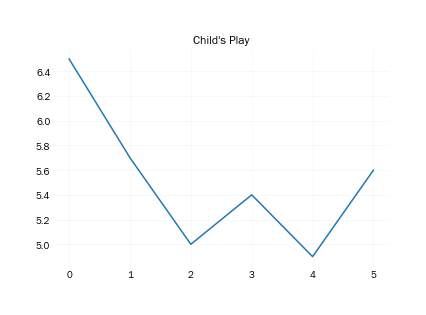

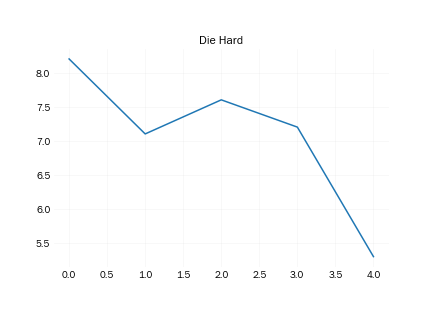

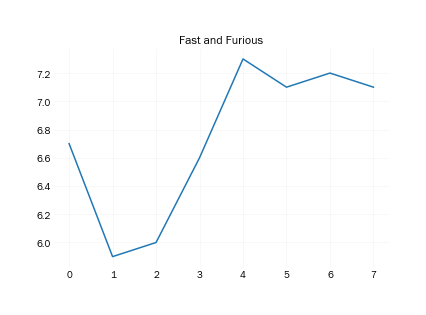

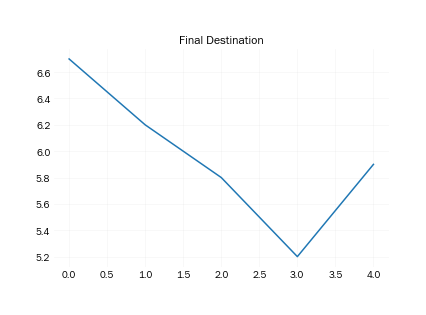

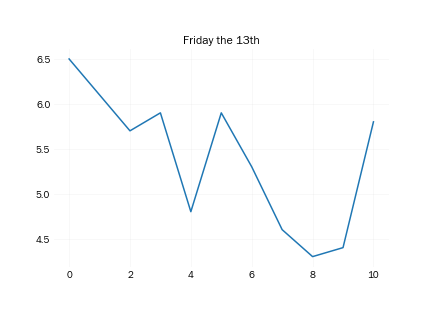

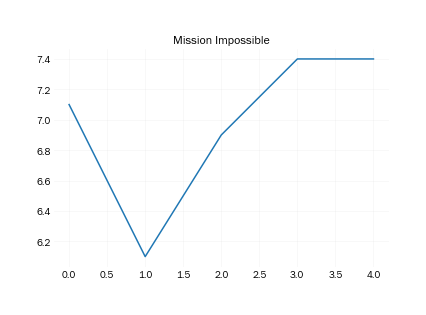

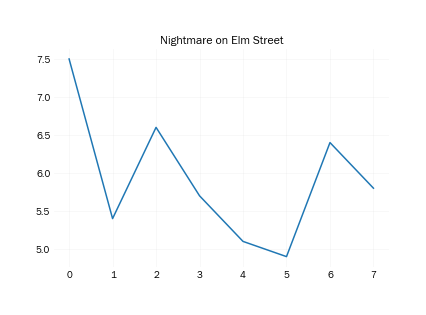

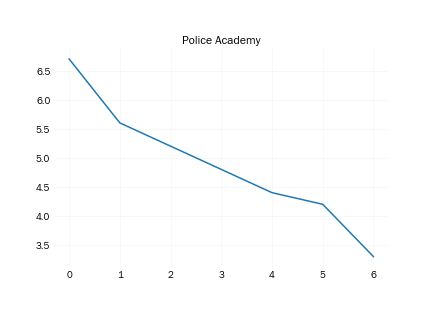

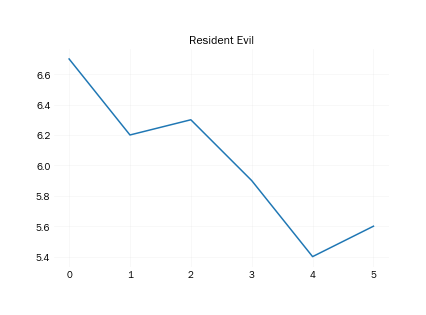

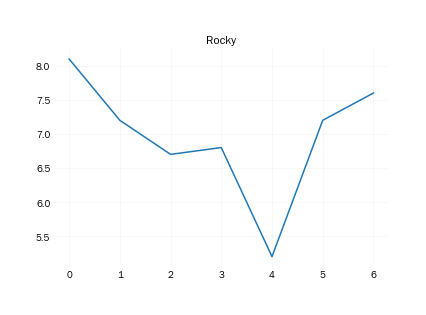

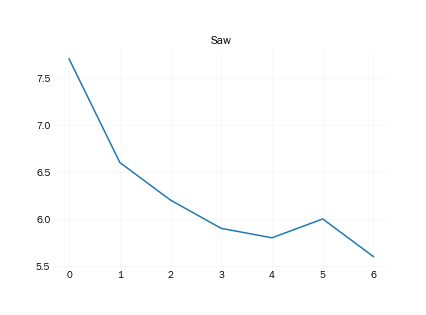

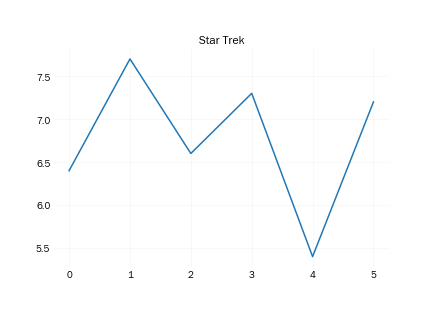

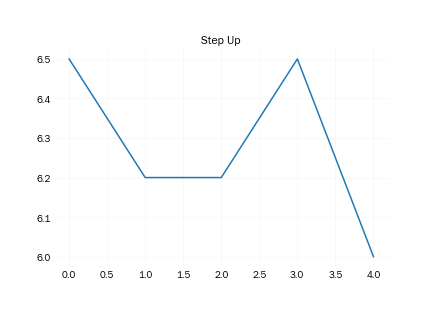

In [95]:
for item in sequels_with_ratings.index.get_level_values(0).unique(): 
    fig = plt.figure(figure=)
    plt.title(item)
    plt.plot(sequels_with_ratings.loc[item].index.values,sequels_with_ratings.loc[item]['rating'])
    plt.show()
        

### Pre-Work for Reference

In order to obtain the titles, I used the IMDBpie title search function and converted to a DataFrame. This produces many false positives. Initially, the intent was to feed the entire list into a separate IMDBpie function that pulls ratings and votes, and then only include films that have more votes than a particular threshold. The intensity of this exercise was going to vary (e.g. quick and dirty trial and error vs. building a classifier). However, I never even made it that far! In practice, the pulling of ratings by ID# took quite a while for each ID, let alone hundreds. Thus, I instead manually selected the films I wanted and created a new dataset, which is the one featured in this code. 

Also note, the original code did not pull "Creed" for Rocky. I had to get the title ID with a manual search.

In [ ]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

def title_search(title):
    return pd.DataFrame(imdb.search_for_title(title),index=[x for x in range(len(pd.DataFrame(imdb.search_for_title(title))))])

titles_to_search=['Fast and Furious','Police Academy',
                  'Nightmare on Elm Street',
                  'Saw',
                  'Friday the 13th',
                  'Star Trek','Final Destination',
                  'Rocky','Step Up',
                  'Mission Impossible','Die Hard','Resident Evil','Child\'s Play']
combined_titles = pd.concat([title_search(title) for title in titles_to_search],keys=titles_to_search)

#clean data
combined_titles.dropna(subset=['year'],inplace=True)
combined_titles['year']=combined_titles['year'].astype('int')
combined_titles = combined_titles[(combined_titles['year']<=2017)&(combined_titles['year']>1975)]